In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from libpysal.weights import Queen

import libpysal
from libpysal import examples
import os
import region as rg
from pysal.viz.splot.libpysal import plot_spatial_weights
from libpysal.weights import Queen, Rook
from region.max_p_regions.heuristics import MaxPRegionsHeu
from region.p_regions.azp import AZPBasicTabu
import math


sns.set(style="whitegrid")

C:\Users\user\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
abb_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\data_codes.csv'
zc_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\Benim oluşturduğum datalar\\map.geojson'

In [3]:
lst=pd.read_csv(abb_link)
lst


,latitude,longitude,price-1,price-2,price-3,price-4,price-5,price-6,price-7,price-8,...,price-16,price-17,price-18,price-19,price-20,price-21,price-22,price-23,price-24,zipcode
0,40.155312,26.414160,33.253990,43.677734,45.336132,45.159160,15.231617,15.774555,41.471990,50.796176,...,25.007249,24.529812,24.254970,15.709353,14.660958,26.350309,32.186581,32.900190,14.003365,1
1,40.601343,33.613421,14.821420,14.709612,14.606618,13.942567,15.732105,16.335903,16.328413,22.272887,...,26.466839,25.939923,25.634393,15.709353,14.660958,14.168674,20.819550,22.002568,14.003365,2
2,40.550556,34.955556,15.186857,14.875222,14.733469,13.932967,16.740344,17.466745,16.889696,24.154059,...,29.407201,28.780610,28.413259,15.709353,14.660958,14.331221,22.831889,24.337175,14.003365,3
3,37.000010,35.321333,16.481372,17.901409,18.062152,17.650404,14.234502,14.656190,18.503141,22.732694,...,22.099327,21.720467,21.506764,15.709353,14.660958,15.610388,19.527870,20.189729,14.003365,4
4,37.764751,38.278561,13.545599,13.642769,13.586999,13.224634,13.429482,13.753278,14.443932,16.899560,...,19.751617,19.452343,19.288000,15.709353,14.660958,14.762111,17.196569,17.619247,14.003365,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,38.682310,29.408190,28.219204,35.833110,37.022632,36.736893,15.199153,15.738143,34.593685,42.764255,...,24.912572,24.438344,24.165493,15.709353,14.660958,19.505837,25.224748,26.100566,14.003365,77
77,38.489140,43.408890,13.342889,13.339914,13.267607,12.905505,13.395826,13.715529,14.165002,16.548583,...,19.653466,19.357518,19.195240,15.709353,14.660958,14.654343,17.026188,17.440692,14.003365,78
78,40.650010,29.266667,39.192057,52.931191,55.142844,55.094669,15.266311,15.813468,49.584098,60.263707,...,25.108428,24.627561,24.350592,15.709353,14.660958,30.961046,36.899889,37.508376,14.003365,79
79,39.818081,34.814690,14.746925,14.327742,14.169892,13.409210,16.393790,17.078050,16.267481,22.994836,...,28.396536,27.804205,27.458103,15.709353,14.660958,14.356447,22.221987,23.614456,14.003365,80


In [4]:
zc = gpd.read_file(zc_link)
zc

,Name,description,timestamp,zipcode,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,stroke,stroke-width,stroke-opacity,fill,fill-opacity,geometry
0,Çanakkale,Il,None,17,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,Çankiri,Il,None,18,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((33.78607 40.96249, 33.78677 40..."
2,Çorum,Il,None,19,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((34.81906 41.20172, 34.84486 41..."
3,Adana,Il,None,1,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,Adiyaman,Il,None,2,,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((38.65534 38.09172, 38.66739 38..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Usak,Il,None,64,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((29.89273 38.77788, 29.89274 38..."
77,Van,Il,None,65,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((43.34184 39.39789, 43.35878 39..."
78,Yalova,Il,None,77,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((29.39486 40.70208, 29.39486 40..."
79,Yozgat,Il,None,66,None,None,None,-1,0,1,None,None,None,NaN,NaN,None,NaN,"MULTIPOLYGON (((35.34320 40.21666, 35.35103 40..."


In [5]:
price=[i for i in lst if 'price-' in i]
price

['price-1',
 'price-2',
 'price-3',
 'price-4',
 'price-5',
 'price-6',
 'price-7',
 'price-8',
 'price-9',
 'price-10',
 'price-11',
 'price-12',
 'price-13',
 'price-14',
 'price-15',
 'price-16',
 'price-17',
 'price-18',
 'price-19',
 'price-20',
 'price-21',
 'price-22',
 'price-23',
 'price-24']

In [6]:
rt_av = lst.groupby('zipcode')[price]\
.mean()

rt_av

,price-1,price-2,price-3,price-4,price-5,price-6,price-7,price-8,price-9,price-10,...,price-15,price-16,price-17,price-18,price-19,price-20,price-21,price-22,price-23,price-24
zipcode,,,,,,,,,,,,,,,,,,,,,
1,33.253990,43.677734,45.336132,45.159160,15.231617,15.774555,41.471990,50.796176,51.982244,34.615021,...,26.757819,25.007249,24.529812,24.254970,15.709353,14.660958,26.350309,32.186581,32.900190,14.003365
2,14.821420,14.709612,14.606618,13.942567,15.732105,16.335903,16.328413,22.272887,25.366922,24.588094,...,28.581896,26.466839,25.939923,25.634393,15.709353,14.660958,14.168674,20.819550,22.002568,14.003365
3,15.186857,14.875222,14.733469,13.932967,16.740344,17.466745,16.889696,24.154059,27.942614,27.379035,...,32.158619,29.407201,28.780610,28.413259,15.709353,14.660958,14.331221,22.831889,24.337175,14.003365
4,16.481372,17.901409,18.062152,17.650404,14.234502,14.656190,18.503141,22.732694,24.525073,22.009012,...,23.073222,22.099327,21.720467,21.506764,15.709353,14.660958,15.610388,19.527870,20.189729,14.003365
5,13.545599,13.642769,13.586999,13.224634,13.429482,13.753278,14.443932,16.899560,18.320669,19.111917,...,20.103808,19.751617,19.452343,19.288000,15.709353,14.660958,14.762111,17.196569,17.619247,14.003365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,28.219204,35.833110,37.022632,36.736893,15.199153,15.738143,34.593685,42.764255,44.280338,28.159987,...,26.637485,24.912572,24.438344,24.165493,15.709353,14.660958,19.505837,25.224748,26.100566,14.003365
78,13.342889,13.339914,13.267607,12.905505,13.395826,13.715529,14.165002,16.548583,17.968019,18.923505,...,19.995827,19.653466,19.357518,19.195240,15.709353,14.660958,14.654343,17.026188,17.440692,14.003365
79,39.192057,52.931191,55.142844,55.094669,15.266311,15.813468,49.584098,60.263707,60.997964,38.996990,...,26.886381,25.108428,24.627561,24.350592,15.709353,14.660958,30.961046,36.899889,37.508376,14.003365


In [7]:
zrt = zc[['geometry','zipcode']].join(rt_av,on='zipcode')\
                                 .dropna()
zrt

,geometry,zipcode,price-1,price-2,price-3,price-4,price-5,price-6,price-7,price-8,...,price-15,price-16,price-17,price-18,price-19,price-20,price-21,price-22,price-23,price-24
0,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...",17,13.395482,13.443346,13.379810,13.026526,13.342635,13.655870,14.233551,16.539168,...,19.787334,19.498343,19.207654,19.048637,15.709353,14.660958,14.713328,16.988156,17.383953,14.003365
1,"MULTIPOLYGON (((33.78607 40.96249, 33.78677 40...",18,13.164428,13.027590,12.932485,12.554277,13.480043,13.809987,13.926462,16.427242,...,20.337985,19.899071,19.594798,19.427355,15.709353,14.660958,14.493363,17.018244,17.464071,14.003365
2,"MULTIPOLYGON (((34.81906 41.20172, 34.84486 41...",19,36.102031,48.115618,50.039316,49.924012,15.249000,15.794052,45.362800,55.338146,...,26.822243,25.057944,24.578789,24.302881,15.709353,14.660958,18.821713,24.626229,25.535447,14.003365
3,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...",1,33.253990,43.677734,45.336132,45.159160,15.231617,15.774555,41.471990,50.796176,...,26.757819,25.007249,24.529812,24.254970,15.709353,14.660958,26.350309,32.186581,32.900190,14.003365
4,"MULTIPOLYGON (((38.65534 38.09172, 38.66739 38...",2,14.821420,14.709612,14.606618,13.942567,15.732105,16.335903,16.328413,22.272887,...,28.581896,26.466839,25.939923,25.634393,15.709353,14.660958,14.168674,20.819550,22.002568,14.003365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"MULTIPOLYGON (((29.89273 38.77788, 29.89274 38...",64,15.696465,16.762315,16.865080,16.466356,14.020528,14.416196,17.417948,21.174964,...,22.283934,21.475306,21.117599,20.917016,15.709353,14.660958,15.383486,18.906769,19.505090,14.003365
77,"MULTIPOLYGON (((43.34184 39.39789, 43.35878 39...",65,13.351133,13.215638,13.119378,12.708435,13.737479,14.098727,14.197334,17.118617,...,21.302865,20.649840,20.320116,20.136888,15.709353,14.660958,14.482559,17.479309,18.008741,14.003365
78,"MULTIPOLYGON (((29.39486 40.70208, 29.39486 40...",77,28.219204,35.833110,37.022632,36.736893,15.199153,15.738143,34.593685,42.764255,...,26.637485,24.912572,24.438344,24.165493,15.709353,14.660958,19.505837,25.224748,26.100566,14.003365
79,"MULTIPOLYGON (((35.34320 40.21666, 35.35103 40...",66,42.944837,58.779548,61.340903,61.374232,15.287505,15.837238,54.710798,66.245964,...,26.964908,25.170235,24.687273,24.409005,15.709353,14.660958,10.700241,16.506712,17.633337,14.003365


In [8]:
zrt.to_file('tnp')
gdf=gpd.read_file('C:\\Users\\user\\Desktop\\Arastirma Gorevi\\tnp\\tnp.shp')
w_queen=Queen.from_dataframe(gdf)
w_rook=Rook.from_dataframe(gdf)

In [9]:
thr=[]
thr_katsayisi_q=[0.15,0.2]
thr_katsayisi_r=[0.14,0.2]

In [10]:
z = zrt.drop(['geometry', 'zipcode'], axis=1).values
z

array([[13.39548199, 13.44334631, 13.37981009, ..., 16.98815591,
        17.38395291, 14.00336491],
       [13.16442827, 13.02758986, 12.93248479, ..., 17.01824406,
        17.46407116, 14.0033649 ],
       [36.10203073, 48.11561822, 50.03931624, ..., 24.62622926,
        25.53544697, 14.00336492],
       ...,
       [28.21920422, 35.8331098 , 37.02263206, ..., 25.22474816,
        26.10056637, 14.00336492],
       [42.94483677, 58.77954771, 61.340903  , ..., 16.5067121 ,
        17.63333731, 14.00336492],
       [13.75906801, 13.5459683 , 13.43266453, ..., 18.74679019,
        19.52653659, 14.00336491]])

[4.0]
With Threshold:  0.15
Label 0 Average Value:  19.946111658166664
Label 1 Average Value:  19.847626055686504
Label 2 Average Value:  20.527532708050927
Label 3 Average Value:  26.996154137990196
[4.0, 3.0]
With Threshold:  0.2
Label 0 Average Value:  26.128054191369042
Label 1 Average Value:  19.765940924563218
Label 2 Average Value:  20.06392654462097


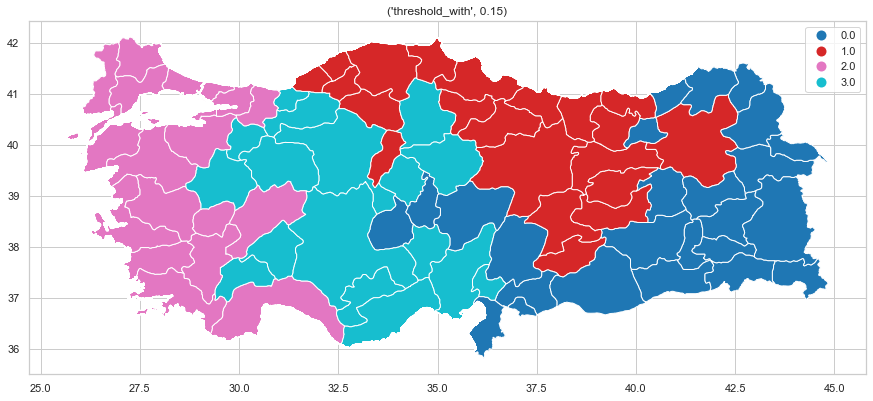

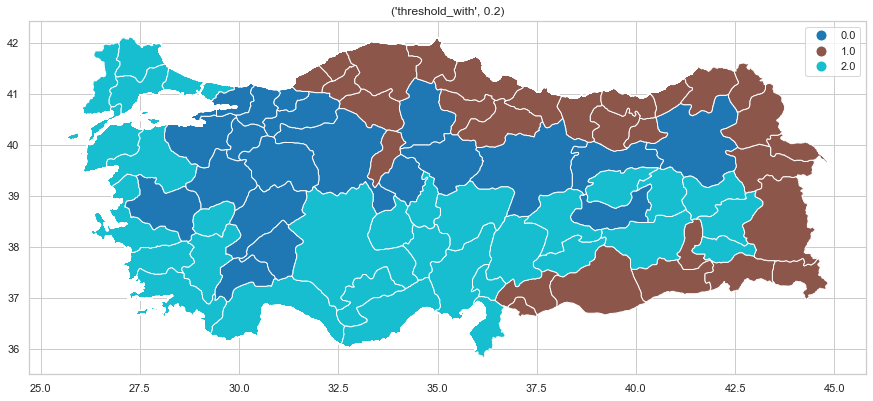

In [13]:
model_q = MaxPRegionsHeu(random_state=1)
label_num_q=[]
for i in range(len(thr_katsayisi_q)):
    
    thr.append([round(x) for x in thr_katsayisi_q[i]*rt_av.sum()]) 
    model_q.fit_from_w(w_queen,z,rt_av.values[:, None], thr)
    gdf.plot(column =model_q.labels_ , categorical = True, figsize = (15, 15), legend = True)
    title_name='threshold_with' , thr_katsayisi_q[i]
    plt.title(title_name)
    thr.clear()
    label_num_q.append(max(model_q.labels_)+1)
    print(label_num_q)
    df1 = pd.DataFrame(zrt.drop(columns='geometry'))
    df1['Labels'] = model_q.labels_
    list_0=[]
    list_1=[]
    list_2=[]
    list_3=[]
    list_sum=[]
    for j in range(len(df1)):
        if(df1['Labels'].iloc[j]==0):

            list_0.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==1):

            list_1.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==2):

            list_2.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==3):

            list_3.append(df1[price].iloc[j].mean())
    
    print("With Threshold: ",thr_katsayisi_q[i])
    print("Label 0 Average Value: ",np.mean(list_0))
    print("Label 1 Average Value: ",np.mean(list_1))
    print("Label 2 Average Value: ",np.mean(list_2))
    if len(list_3)!=0:
        print("Label 3 Average Value: ",np.mean(list_3))

[4.0]
With Threshold:  0.14
Label 0 Average Value:  19.46466581909091
Label 1 Average Value:  21.113483091179162
Label 2 Average Value:  26.533004929675922
Label 3 Average Value:  19.799845196980158
[4.0, 3.0]
With Threshold:  0.2
Label 0 Average Value:  19.54337230902778
Label 1 Average Value:  19.14861665929301
Label 2 Average Value:  28.198743100270832


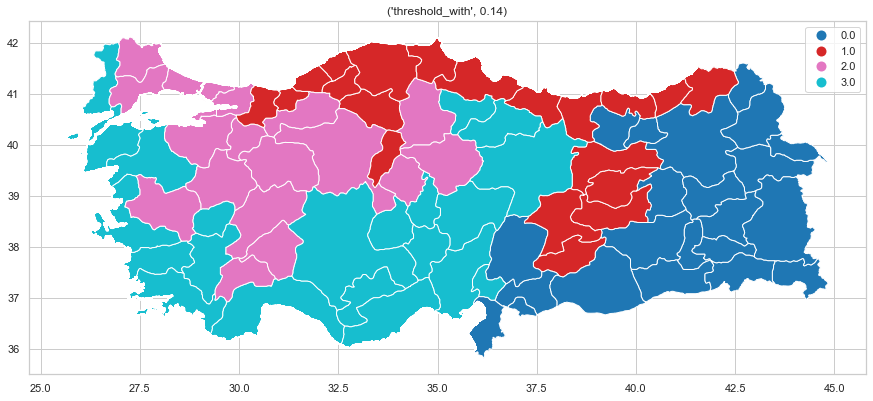

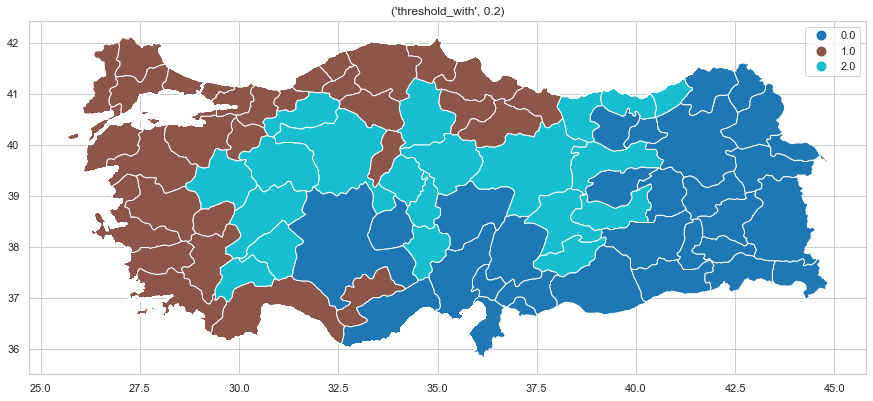

In [14]:
model_r =MaxPRegionsHeu(random_state=1)
label_num_r=[]
for i in range(len(thr_katsayisi_r)):
    thr.append([round(x) for x in thr_katsayisi_r[i]*rt_av.sum()]) 
    model_r.fit_from_w(w_rook,z,rt_av.values[:,None],thr)
    gdf.plot(column =model_r.labels_ , categorical = True, figsize = (15, 15), legend = True)
    title_name='threshold_with' , thr_katsayisi_r[i]
    plt.title(title_name)
    thr.clear()
    label_num_r.append(max(model_r.labels_)+1)
    print(label_num_r)
    df1 = pd.DataFrame(zrt.drop(columns='geometry'))
    df1['Labels'] = model_r.labels_
    list_0=[]
    list_1=[]
    list_2=[]
    list_3=[]
    list_sum=[]
    for j in range(len(df1)):
        if(df1['Labels'].iloc[j]==0):

            list_0.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==1):

            list_1.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==2):

            list_2.append(df1[price].iloc[j].mean())

        elif(df1['Labels'].iloc[j]==3):

            list_3.append(df1[price].iloc[j].mean())
    print("With Threshold: ",thr_katsayisi_r[i])
    print("Label 0 Average Value: ",np.mean(list_0))
    print("Label 1 Average Value: ",np.mean(list_1))
    print("Label 2 Average Value: ",np.mean(list_2))
    if len(list_3)!=0:
        print("Label 3 Average Value: ",np.mean(list_3))